## LetsGrowMoreVIP - Data Science Intern

## Advanced Level - ML Facial recognition to Detect mood and suggest Songs accordingly

### Author - Vandana Prajapati

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import cv2
import warnings
warnings.filterwarnings('ignore')

### Training Model

In [2]:
train_path = 'C:\\archive\\train'
test_path = 'C:\\archive\\test'


In [7]:
img_size = 48

In [3]:
def plot_images(img_dir, top=20):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for Id, img_path in enumerate(img_files):
        plt.subplot(5, 5, Id+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

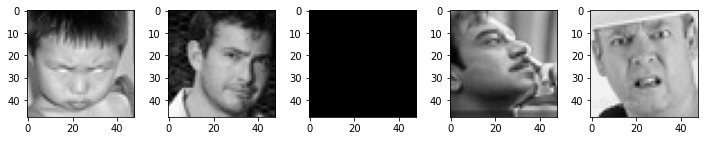

In [6]:
plot_images(train_path+'/angry')

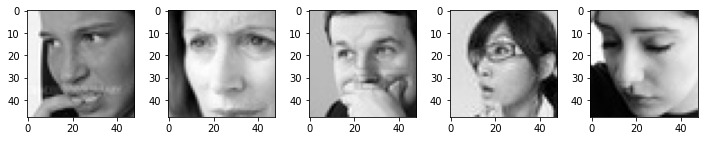

In [5]:
plot_images(train_path+'/fear')

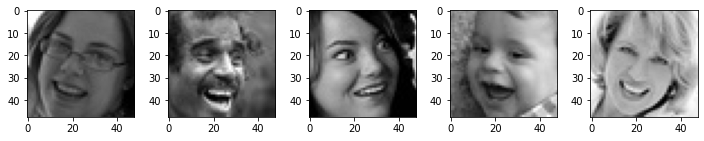

In [6]:
plot_images(train_path+'/happy')

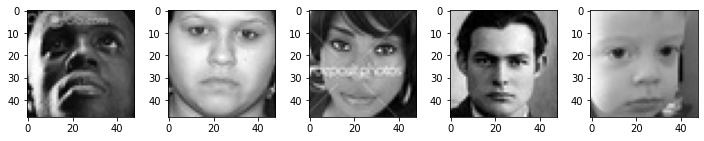

In [9]:
plot_images(train_path+'/neutral')

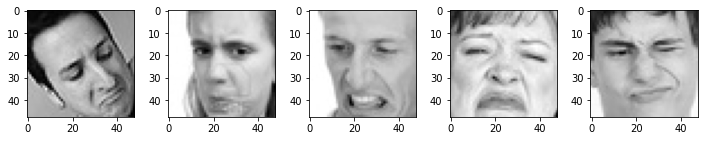

In [10]:
plot_images(train_path+'/disgust')

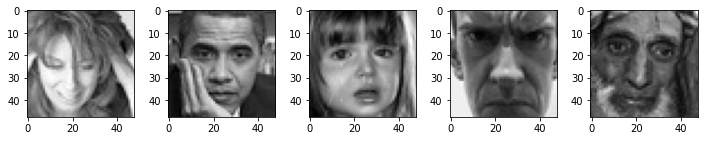

In [11]:
plot_images(train_path+'/sad')

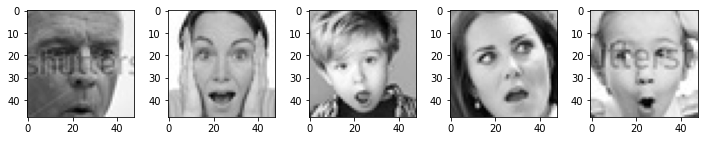

In [12]:
plot_images(train_path+'/surprise')

### Processing

In [4]:
emotion_labels = sorted(os.listdir(train_path))
print("Emotion labels:")
for i in emotion_labels:
    print(i)


Emotion labels:
angry
disgust
fear
happy
neutral
sad
surprise


### Rescaling

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_data_gen.flow_from_directory(
        'C:\\archive\\train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [7]:
test_generator = test_data_gen.flow_from_directory(
        'C:\\archive\\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


### Model Creation

In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten

In [11]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

### Training the Model

In [12]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=1,
        validation_data=test_generator,
        validation_steps=7178 // 64)

448/448 [==============================] - 1588s 4s/step - loss: 1.8019 - accuracy: 0.2598 - val_loss: 1.7227 - val_accuracy: 0.3097


In [26]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

### Saving Model

In [13]:
emotion_model.save('emotion_detection_model.h5')
print("Model Saved!")

Model Saved!


In [14]:
emotion_model.save_weights('emotion_detection_model_weights.h5')
print("Model weights Saved!")

Model weights Saved!


### Plotting

In [15]:
accuracy = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
epochs = range(len(accuracy))

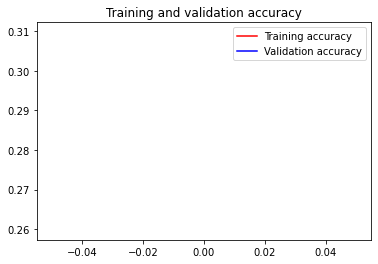

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


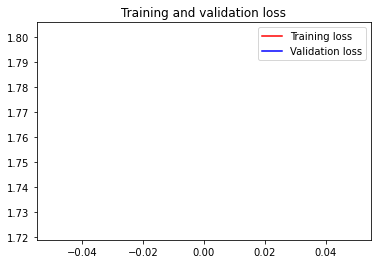

In [29]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()


In [18]:
from keras.preprocessing import image
import numpy as np

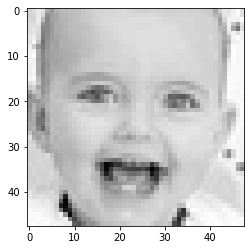

In [20]:
test_img_path = test_path+"/happy/PrivateTest_9488237.jpg"
test_img = image.load_img(test_img_path, target_size=(48,48), color_mode="grayscale")
test_img = np.array(test_img)
plt.imshow(test_img, cmap='gray')

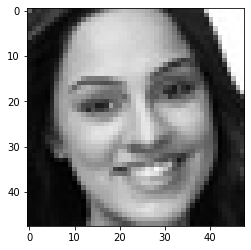

In [25]:
test_img_path = test_path+"/happy/PrivateTest_10613684.jpg"
test_img = image.load_img(test_img_path, target_size=(48,48), color_mode="grayscale")
test_img = np.array(test_img)
plt.imshow(test_img, cmap='gray')

In [21]:
print("Shape of Image:",test_img.shape)

Shape of Image: (48, 48)


In [22]:
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img.reshape(1, 48, 48, 1)

In [23]:
result = emotion_model.predict(test_img)
result = list(result[0])
ind = result.index(max(result))
emotion = emotion_labels[ind]
print("Predicted Emotion = ",emotion)

Predicted Emotion =  happy


In [34]:
from IPython.display import Audio


### Loading Songs

In [27]:
import IPython
main_songs_path = 'C:\\happy mood.mp3'
song_path = main_songs_path+emotion
song = os.path.join(song_path,emotion)
print(f'Playing {emotion} song')
IPython.display.Audio("C:\\happy mood.mp3",autoplay=True)

Playing happy song


## Thank you !!!